In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random
from scipy.stats import norm
import scipy.stats as stats
import pandas as pd
%matplotlib inline

print("packages imported")

packages imported


In [9]:
data_weather = pd.read_csv('weatherstats_vancouver_daily_2025.csv')
data_customers = pd.read_csv('customer_data_2025.csv')

df_weather = pd.DataFrame(data_weather)
df_customers = pd.DataFrame(data_customers)

- Temperature is bimodally distributed
- Precipitation is exponentially distributed
- Humidity is normally distributed

In [10]:
df_customers

,Hour,January_Frequency_Customers_Alumni_Centre,January_Frequency_Customers_Sauder,July_Frequency_Customers_Alumni_Centre,July_Frequency_Customers_Sauder
0,7,87,68,87,0
1,8,235,187,137,111
2,9,372,305,203,186
3,10,410,301,222,187
4,11,533,414,265,245
5,12,710,598,389,337
6,13,747,603,401,362
7,14,815,662,478,378
8,15,737,607,397,312
9,16,704,524,375,0


In [20]:
jan_daily_mean_alum = df_customers['January_Frequency_Customers_Alumni_Centre'].sum() / 30 
# one public holiday in january -> open 30/31 days, same in july
jan_daily_mean_sauder = df_customers['January_Frequency_Customers_Sauder'].sum() / 30
july_daily_mean_alum = df_customers['July_Frequency_Customers_Alumni_Centre'].sum() / 30 
july_daily_mean_sauder = df_customers['July_Frequency_Customers_Sauder'].sum() / 30

# overall daily means
jan_daily_mean = (df_customers['January_Frequency_Customers_Alumni_Centre'].sum() + df_customers['January_Frequency_Customers_Sauder'].sum()) / 30
july_daily_mean = (df_customers['July_Frequency_Customers_Alumni_Centre'].sum() + df_customers['July_Frequency_Customers_Sauder'].sum()) / 30

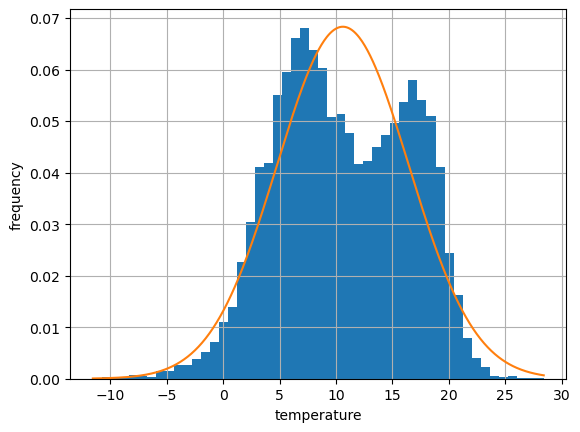

In [17]:
# distribution for the weather
# big assumption that perhaps should be rolled back - it is normal 
df_weather['temperature'].hist(bins=50, density=True)
plt.xlabel('temperature')
plt.ylabel('frequency')
x = np.linspace(df_weather['temperature'].min(), df_weather['temperature'].max(), 500)
y = stats.norm.pdf(x, loc=df_weather['temperature'].mean(), scale=df_weather['temperature'].std())
plt.plot(x,y)
plt.show()

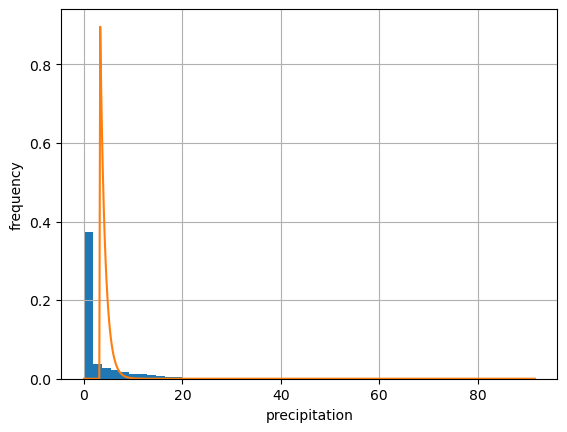

In [18]:
# distribution for precipitation
df_weather['precipitation'].hist(bins=50, density=True)
plt.xlabel('precipitation')
plt.ylabel('frequency')
x = np.linspace(df_weather['precipitation'].min(), df_weather['precipitation'].max(), 500)
y = stats.expon.pdf(x, df_weather['precipitation'].mean())
plt.plot(x,y)
plt.show()

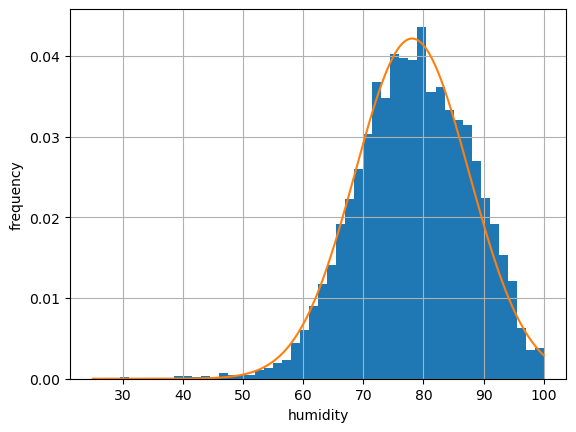

In [19]:
# distribution for humidity 
df_weather['humidity'].hist(bins=50, density=True)
plt.xlabel('humidity')
plt.ylabel('frequency')
x = np.linspace(df_weather['humidity'].min(), df_weather['humidity'].max(), 500)
y = stats.norm.pdf(x, loc=df_weather['humidity'].mean(), scale=df_weather['humidity'].std())
plt.plot(x,y)
plt.show()

- iterated through a values from -3 to 4, b values from 10 to 30, c values from -5 to 0
- using January as a reference point, the values that got us closest to the correct July values were a=-3, b=32, c=-1

In [24]:
jan_weather_data = df_weather[df_weather['Month']==1]
july_weather_data = df_weather[df_weather['Month']==1]

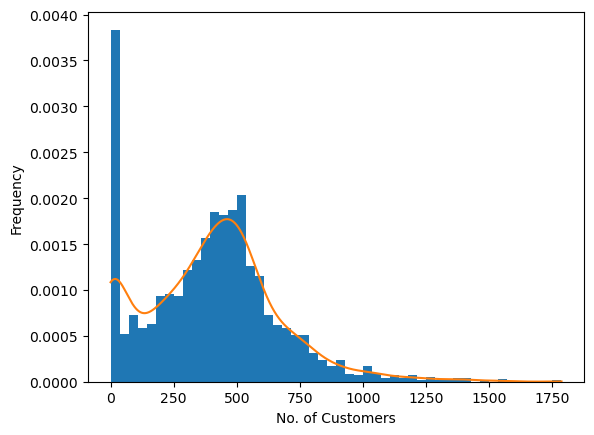

In [31]:
# 11 stat holidays per year
N = 2000
C0 = jan_daily_mean # using January as a reference point once again
C = july_daily_mean
T0 = jan_weather_data['temperature'].mean() # again, Jan as a reference point 
P0 = jan_weather_data['precipitation'].mean()
H0 = jan_weather_data['humidity'].mean()

T = np.random.normal(loc=df_weather['temperature'].mean(), scale=df_weather['temperature'].std(), size=N)
P = np.random.exponential(scale=df_weather['precipitation'].mean(), size=N)
H = np.random.normal(loc=df_weather['humidity'].mean(), scale=df_weather['humidity'].std(), size=N)

a=-3
b=32
c=-1

num = C0 + a * (T - T0)**2 - b * (P - P0) - c * (H - H0)**2
C1 = np.maximum(num, 0)

kde_Y = stats.gaussian_kde(C1)
plt.hist(C1,bins=50,density=True)
plt.xlabel('No. of Customers')
plt.ylabel('Frequency')
t = np.linspace(0,C1.max(),3000)
plt.plot(t,kde_Y(t))
plt.show()

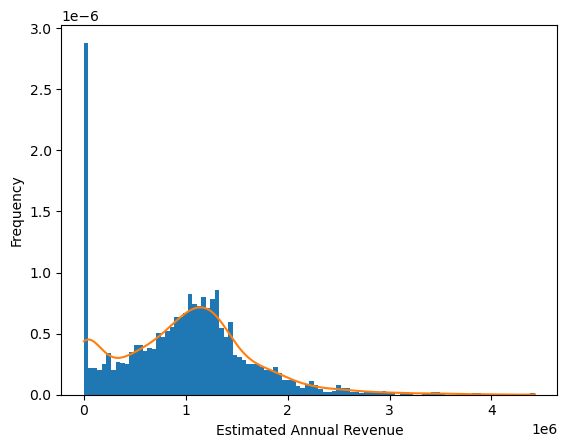

In [33]:
# our estimate for avg spend per customer was $7.30 for alumni cafe & $6.70 for sauder cafe
# taking the average of these two, we assume each customer spent $7
# then for yearly revenue - there are 11 stat holidays in BC so 365-11 = 354 working days 
# revenue:
revenue_annual = C1 * 7 * 354

kde_rev = stats.gaussian_kde(revenue_annual)
plt.hist(revenue_annual,bins=100,density=True)
plt.xlabel('Estimated Annual Revenue')
plt.ylabel('Frequency')
t = np.linspace(0,revenue_annual.max(),3000)
plt.plot(t,kde_rev(t))
plt.show()

In [34]:
# mean estimated revenue: 
print(revenue_annual.mean())

981576.3234809687
